In [1]:
from google.colab import files
uploaded = files.upload()

Saving banking.csv to banking.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset= pd.read_csv('banking.csv')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#HANDLING CATEGORICAL DATA

In [4]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('banking.csv') 
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[27 1 'married' ... -36.1 4.963 5228.1]
 [36 9 'married' ... -42.0 4.021 5195.8]
 [11 4 'single' ... -39.8 0.7290000000000001 4991.6]
 ...
 [25 0 'single' ... -36.4 4.857 5191.0]
 [31 9 'married' ... -26.9 0.742 5017.5]
 [8 8 'single' ... -36.4 4.859 5191.0]]


In [5]:
x = dataset[['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx',	'euribor3m','nr_employed'	]]
#separate the other attributes from the predicting attribute

In [6]:
y = dataset[['y']]
#separte the predicting attribute into Y for model training 

#GRAPHS

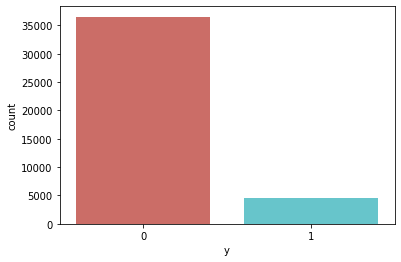

In [7]:
seaborn.countplot(x='y',data=dataset, palette='hls')
plt.show()

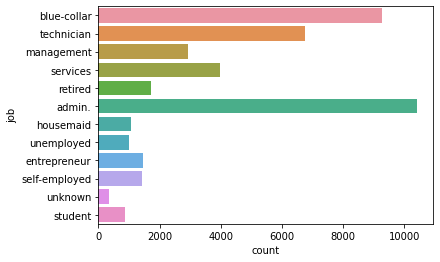

In [8]:
seaborn.countplot(y="job", data=dataset)
plt.show()

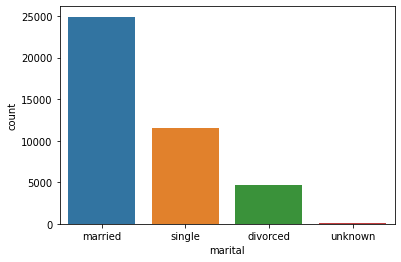

In [9]:
seaborn.countplot(x="marital", data=dataset)
plt.show()

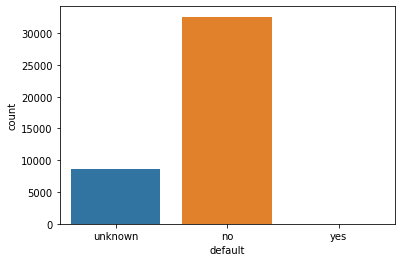

In [10]:
seaborn.countplot(x="default", data=dataset)
plt.show()

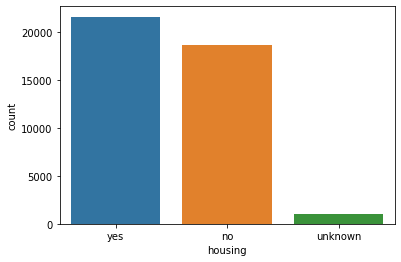

In [11]:
seaborn.countplot(x="housing", data=dataset)
plt.show()

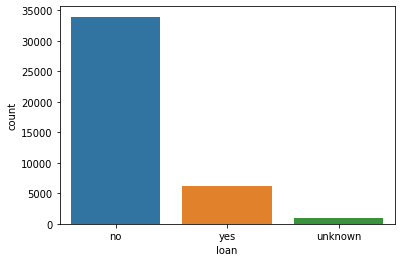

In [12]:
seaborn.countplot(x="loan", data=dataset)
plt.show()

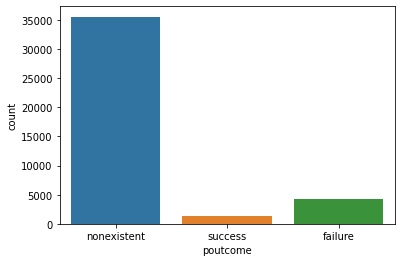

In [13]:
seaborn.countplot(x="poutcome", data=dataset)
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [15]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.20987654 0.00854006 0.14285714 ... 0.36820084 0.78032192 0.8778828 ]
 [0.16049383 0.10451403 0.14285714 ... 0.61506276 0.98141011 1.        ]
 [0.22222222 0.06486377 0.02380952 ... 0.37656904 0.98231693 1.        ]
 ...
 [0.17283951 0.07543717 0.02380952 ... 0.37656904 0.98118341 1.        ]
 [0.14814815 0.04107361 0.02380952 ... 0.19246862 0.15393335 0.51228733]
 [0.19753086 0.02602684 0.         ... 0.37656904 0.95896622 1.        ]]
[[0.41975309 0.02114681 0.07142857 ... 0.15481172 0.1747903  0.51228733]
 [0.17283951 0.11203741 0.04761905 ... 0.15481172 0.18861936 0.51228733]
 [0.19753086 0.02358682 0.02380952 ... 0.33891213 0.98118341 1.        ]
 ...
 [0.49382716 0.00101667 0.         ... 0.36820084 0.91339832 0.8778828 ]
 [0.17283951 0.07604717 0.         ... 0.60251046 0.95737928 0.85973535]
 [0.28395062 0.00427003 0.80952381 ... 0.33891213 0.98254364 1.        ]]


#ALGORITHM

In [16]:
model =LogisticRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [17]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print('Intercept is :',model.intercept_)

Intercept is : [0.0026714]


In [19]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[ 0.00036516  0.0044905  -0.05846083 -0.00165385  0.008173   -0.25551001
   0.21112158  0.04729749 -0.27277267 -0.00372488]]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [20]:
predictions = model.predict(x_test)

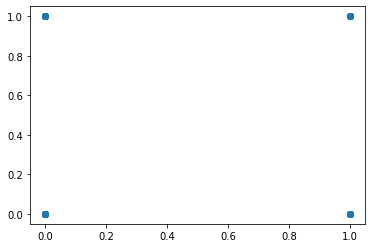

In [21]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !!it is almost forming a linear line with less deviation

#EVALUATION

In [22]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,predictions))
print('Mean squared error is:', metrics.mean_squared_error(y_test,predictions))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean abolute error is: 0.08994901675163874
Mean squared error is: 0.08994901675163874
Root mean squared error is: 0.2999150158822308


In [24]:
print(metrics.accuracy_score(y_test, predictions))

0.9100509832483612


#SAVING THE MODEL USING PICKLE LIBRARY

In [25]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([0, 0, 0, ..., 0, 0, 0])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
y_train =y_train[0:8238]
results =confusion_matrix(y_train, predictions)
print(results)

[[6825  489]
 [ 863   61]]


Precision, Recall, Support, Fscore

In [27]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_train, predictions, average='macro')

(0.4993281146532968, 0.4995796178117753, 0.49632333056632705, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [28]:
results =confusion_matrix(y_test, predictions)
print(results)

[[7136  189]
 [ 552  361]]


Precision, Recall, Support, Fscore

In [29]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_test, predictions, average='macro')

(0.7922817141235455, 0.6847988665801898, 0.7220746348835339, None)